In [ ]:
from openai import OpenAI
import os
import json
import base64
from dotenv import load_dotenv
load_dotenv()

# 实例化 OpenAI 客户端
# 建议显式传递 api_key 和 base_url，或者确保它们在环境变量中已设置
client = OpenAI(
    api_key=os.getenv("OPENAI_API_KEY"),
    base_url=os.getenv("OPENAI_BASE_URL")
)

In [2]:
os.getenv("OPENAI_BASE_URL")

'https://api.bltcy.ai/v1'

# 图片

ChatCompletion(id='chatcmpl-B20251125213719547017028MosydTh4', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='', refusal=None, role='assistant', annotations=None, audio=None, function_call=None, tool_calls=None))], created=1764077851, model='gemini-3-pro-image-preview', object='chat.completion', service_tier=None, system_fingerprint=None, usage=CompletionUsage(completion_tokens=1314, prompt_tokens=20, total_tokens=1334, completion_tokens_details=CompletionTokensDetails(accepted_prediction_tokens=None, audio_tokens=0, reasoning_tokens=72, rejected_prediction_tokens=None, text_tokens=0), prompt_tokens_details=PromptTokensDetails(audio_tokens=0, cached_tokens=0, text_tokens=20, image_tokens=0), input_tokens=0, output_tokens=0, input_tokens_details=None, output_tokens_details=None, claude_cache_creation_5_m_tokens=0, claude_cache_creation_1_h_tokens=0))

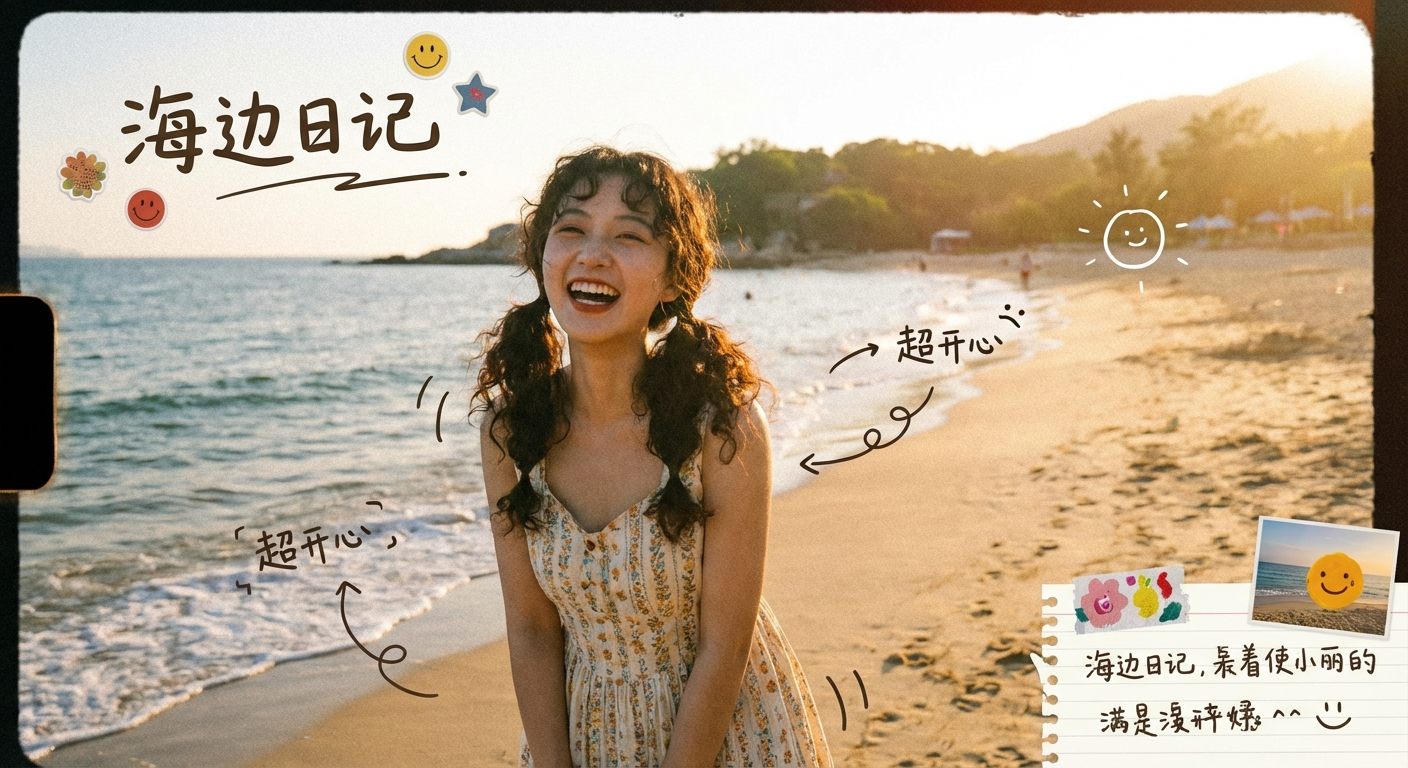

In [46]:
# 发送 Chat Completion 请求
# content = "1girl,Clean face,Long black hair,jewelry,flower,earrings,parted_lips,makeup,rose,bird,white headwear,white_flower,building,portrait,blue flower,yellow flower,hat flower,red lips,orange flower,cinematic lighting,strong contrast,romantic realism style,high level of detail"
# content = "一位身着精美刺绣浅蓝色汉服的东方古典美女，站在盛开的桃花树下，微风吹拂着她的发丝和丝带，精致的妆容，肤如凝脂，眼神温柔似水，柔和的自然光透过树叶洒下斑驳的光影（丁达尔效应），背景虚化，电影级构图，8k分辨率，超高清细节。"
content = "双马尾卷发的中国女孩, 超漂亮的, 海边写真, 小红书风格"
try:
    response = client.chat.completions.create(
        model="gemini-3-pro-image-preview",
        # model="nano-banana-2-4k",  # 这个看着不行
        messages=[
            {
                "role": "user", 
                "content": content,
            }
        ],
        timeout=600
    )
    # 打印完整的响应对象（用于调试）
    print(response)
    
except Exception as e:
    print(f"发生错误: {e}")

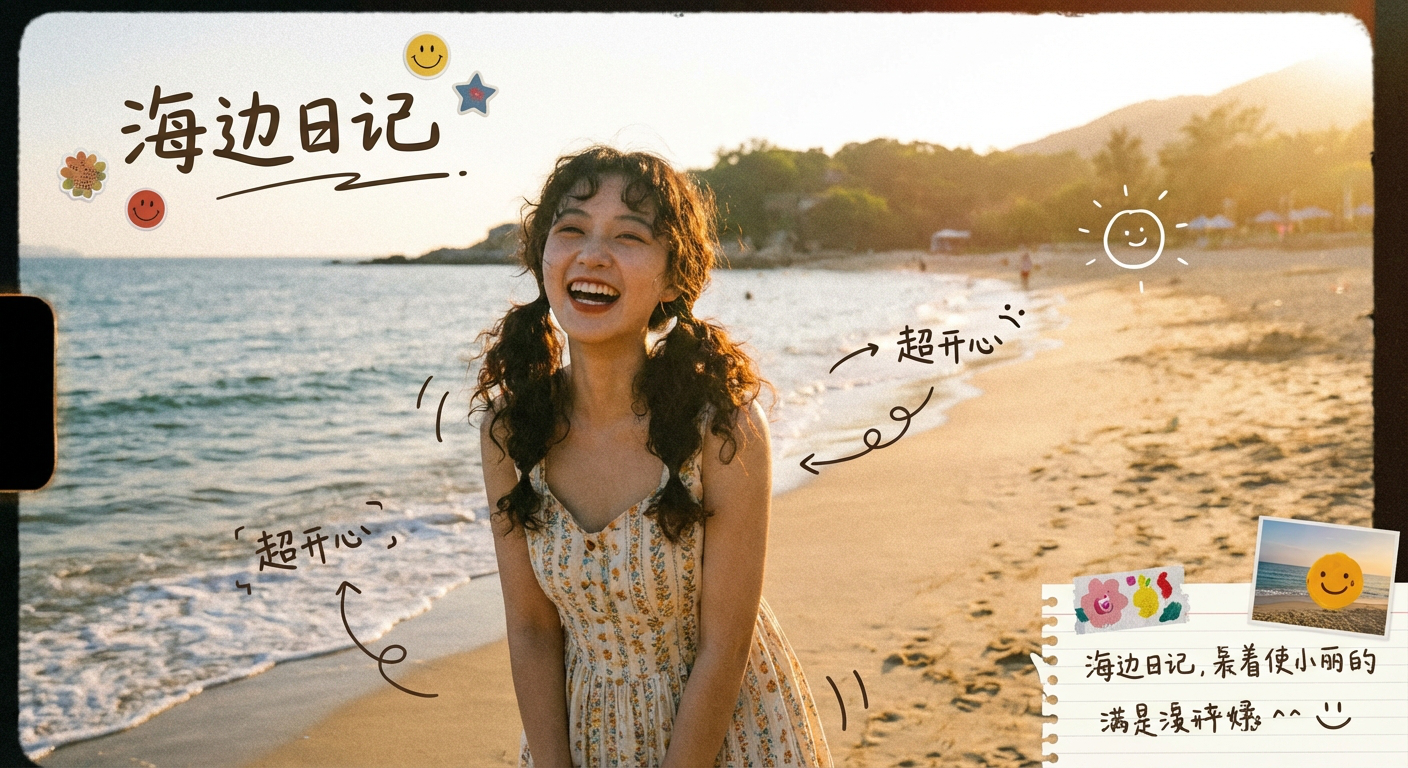

成功解析并显示图片，尺寸: (1408, 768)


In [47]:
import re
import base64
from io import BytesIO
from PIL import Image
from IPython.display import display

# 获取响应内容
content: str = response.choices[0].message.content

# 正则表达式匹配 Markdown 图片语法 ![alt](data:image/type;base64,content)
# 捕获 base64 字符串部分
pattern = r"!\[.*?\]\(data:image\/.*?;base64,(.*?)\)"
match = re.search(pattern, content, re.DOTALL)

if match:
    base64_data = match.group(1)
    try:
        # 解码 base64 数据
        image_bytes = base64.b64decode(base64_data)
        
        # 转换为图片对象并显示
        image = Image.open(BytesIO(image_bytes))
        display(image)
        print(f"成功解析并显示图片，尺寸: {image.size}")
        
        # 如果需要保存到文件
        # image.save("output_image.png")
        
    except Exception as e:
        print(f"图片转换出错: {e}")
else:
    print("未在内容中找到符合格式的 Base64 图片链接")
    print("原始内容预览:", content[:200])

# 图片专用接口

能用的模型比较少

In [ ]:
# content = "1girl,Clean face,Long black hair,jewelry,flower,earrings,parted_lips,makeup,rose,bird,white headwear,white_flower,building,portrait,blue flower,yellow flower,hat flower,red lips,orange flower,cinematic lighting,strong contrast,romantic realism style,high level of detail"
content = "一位身材健美的运动型中国美女，穿着紧身瑜伽服，正在晨光中的城市屋顶做伸展运动，汗水在皮肤上闪耀着光泽，马尾辫高高束起，展现出健康的肌肉线条，清晨金色的阳光从侧面照射，充满活力和正能量，高清摄影，景深效果。"
try:
    response = client.images.generate(
        # model="gemini-3-pro-image-preview",
        model="nano-banana-2-4k",
        prompt=content,
        timeout=600,
        extra_body={
            "aspect_ratio": "1:1",
            "image_size": "4k",
        }
    )
    # 打印完整的响应对象（用于调试）
    print(response)
    
except Exception as e:
    print(f"发生错误: {e}")

发生错误: Error code: 500 - {'error': {'message': 'not supported model for image generation (request id: B20251123225426544957677HnLcvcbz)', 'type': 'new_api_error', 'param': '', 'code': 'convert_request_failed'}}


In [ ]:
import requests
import json

url = f"{os.environ.get('OPENAI_BASE_URL')}/images/generations"

# content = "1girl,Clean face,Long black hair,jewelry,flower,earrings,parted_lips,makeup,rose,bird,white headwear,white_flower,building,portrait,blue flower,yellow flower,hat flower,red lips,orange flower,cinematic lighting,strong contrast,romantic realism style,high level of detail"
content = "一位身材健美的运动型中国美女，穿着紧身瑜伽服，正在晨光中的城市屋顶做伸展运动，汗水在皮肤上闪耀着光泽，马尾辫高高束起，展现出健康的肌肉线条，清晨金色的阳光从侧面照射，充满活力和正能量，高清摄影，景深效果。"

payload = json.dumps(
    {
        "prompt": content,
        "model": "nano-banana-2-4k",
        # "model": "nano-banana",
        "aspect_ratio": "1:1",
        "image_size": "4k",
    }
)
headers = {"Authorization": f'Bearer {os.environ.get("OPENAI_API_KEY")}', "Content-Type": "application/json"}

response = requests.request("POST", url, headers=headers, data=payload, timeout=600)

print(response.text)

{"created":1763910063,"data":[{"revised_prompt":"一位身材健美的运动型中国美女，穿着紧身瑜伽服，正在晨光中的城市屋顶做伸展运动，汗水在皮肤上闪耀着光泽，马尾辫高高束起，展现出健康的肌肉线条，清晨金色的阳光从侧面照射，充满活力和正能量，高清摄影，景深效果。","url":"https://webstatic.aiproxy.vip/output/20251123/e08571d5-2d66-4e39-a90a-0029119d6def.png"}],"model":"nano-banana","usage":{"prompt_tokens":86,"completion_tokens":1290,"total_tokens":1376,"input_tokens":86,"output_tokens":1290}}


# 视频

In [48]:
import requests
import json

url = "https://api.bltcy.ai/v2/videos/generations"

payload = json.dumps({
   "prompt": "一个双马尾的可爱中国女孩走在海边",
   "model": "veo3",
   "aspect_ratio": "16:9",
   "enhance_prompt": True,
   "enable_upsample": True
})
headers = {
   'Authorization': f'Bearer {os.environ.get("OPENAI_API_KEY")}',
   'Content-Type': 'application/json'
}

response = requests.request("POST", url, headers=headers, data=payload, timeout=600)

print(response.text)

{"task_id":"veo3:1764115725-H3wePsu7w2"}


In [53]:
# 查询任务

import requests

url = "https://api.bltcy.ai/v2/videos/generations/veo3:1764115725-H3wePsu7w2"

payload={}
headers = {
   'Authorization': f'Bearer {os.environ.get("OPENAI_API_KEY")}',
}

response = requests.request("GET", url, headers=headers, data=payload)

response.json()

{'task_id': 'veo3:1764115725-H3wePsu7w2',
 'platform': 'google',
 'action': 'google-videos',
 'status': 'SUCCESS',
 'fail_reason': '',
 'submit_time': 1764115726,
 'start_time': 1764115742,
 'finish_time': 1764115892,
 'progress': '100%',
 'data': {'output': 'https://filesystem.site/cdn/20251126/2e82581d664535ae3b5a67c2e80bd0.mp4'},
 'cost': 1.5,
 'search_item': ''}

# 文本

In [24]:
# 发送 Chat Completion 请求
try:
    response = client.chat.completions.create(
        model="gemini-3-pro-preview",
        messages=[
            {
                "role": "user", 
                "content": "生成10个描述美女的prompt，每个prompt不少于15个单词，包含细节描写，风格，光影等方面，用中文回答",
            }
        ],
        timeout=600,
    )
    # 打印完整的响应对象（用于调试）
    print(response)
    
except Exception as e:
    print(f"发生错误: {e}")

ChatCompletion(id='chatcmpl-B202511232231262944370opVhWzXI', choices=[Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='这里为您生成了10个不同风格、场景和光影设定的美女描述Prompt（提示词），旨在生成高质量的AI绘画作品：\n\n**1. 古典温婉风格 (汉服)**\n一位身着精美刺绣浅蓝色汉服的东方古典美女，站在盛开的桃花树下，微风吹拂着她的发丝和丝带，精致的妆容，肤如凝脂，眼神温柔似水，柔和的自然光透过树叶洒下斑驳的光影（丁达尔效应），背景虚化，电影级构图，8k分辨率，超高清细节。\n\n**2. 赛博朋克风格 (未来都市)**\n一位留着银色短发的赛博朋克风格叛逆美女，穿着反光的黑色紧身皮衣和发光的机械战术装备，站在雨夜的霓虹街道上，蓝色和粉色的霓虹灯光映在她的脸上形成强烈的冷暖对比，眼神锐利冷酷，未来主义风格，虚幻引擎5渲染，超写实主义，潮湿的地面反射。\n\n**3. 清新日系风格 (胶片感)**\n一位清纯的校园美女，穿着白色的衬衫和百褶裙，背着书包站在海边的电车站台，海风吹乱了她的黑色长发，阳光明媚，回头微笑的瞬间，逆光拍摄，轮廓光清晰，画面充满空气感，色彩清新透亮，日系胶片摄影风格，柯达Portra 400胶卷质感。\n\n**4. 奇幻精灵风格 (梦幻)**\n森林深处的精灵少女，拥有尖尖的耳朵和翠绿色的眼睛，身穿飘逸的白色薄纱长裙，头戴鲜花编织的花环，周围环绕着发光的萤火虫，神秘的月光从上方倾泻而下，营造出梦幻空灵的氛围，柔焦摄影，极细腻的皮肤纹理，阿尔丰斯·慕夏艺术风格与写实结合。\n\n**5. 高级时尚风格 (杂志大片)**\n一张极具冲击力的高级时尚模特面部特写，拥有完美的五官比例和鲜艳的红唇，眼神迷离而性感，佩戴着夸张的金色耳环，采用蝴蝶光打光方式突出面部立体感，背景为纯黑色，极高对比度，细腻的毛孔可见，Vogue杂志封面风格，黑白摄影。\n\n**6. 蒸汽朋克风格 (复古机械)**\n一位充满活力的蒸汽朋克机械师美女，戴着黄铜护目镜，脸上沾着少许油污，穿着棕色皮革背带裤和白色衬衫，背景是复杂的齿轮和蒸汽管道，暖色调的复古钨丝灯

In [25]:
# 获取结果
content = response.choices[0].message.content
print(content)

这里为您生成了10个不同风格、场景和光影设定的美女描述Prompt（提示词），旨在生成高质量的AI绘画作品：

**1. 古典温婉风格 (汉服)**
一位身着精美刺绣浅蓝色汉服的东方古典美女，站在盛开的桃花树下，微风吹拂着她的发丝和丝带，精致的妆容，肤如凝脂，眼神温柔似水，柔和的自然光透过树叶洒下斑驳的光影（丁达尔效应），背景虚化，电影级构图，8k分辨率，超高清细节。

**2. 赛博朋克风格 (未来都市)**
一位留着银色短发的赛博朋克风格叛逆美女，穿着反光的黑色紧身皮衣和发光的机械战术装备，站在雨夜的霓虹街道上，蓝色和粉色的霓虹灯光映在她的脸上形成强烈的冷暖对比，眼神锐利冷酷，未来主义风格，虚幻引擎5渲染，超写实主义，潮湿的地面反射。

**3. 清新日系风格 (胶片感)**
一位清纯的校园美女，穿着白色的衬衫和百褶裙，背着书包站在海边的电车站台，海风吹乱了她的黑色长发，阳光明媚，回头微笑的瞬间，逆光拍摄，轮廓光清晰，画面充满空气感，色彩清新透亮，日系胶片摄影风格，柯达Portra 400胶卷质感。

**4. 奇幻精灵风格 (梦幻)**
森林深处的精灵少女，拥有尖尖的耳朵和翠绿色的眼睛，身穿飘逸的白色薄纱长裙，头戴鲜花编织的花环，周围环绕着发光的萤火虫，神秘的月光从上方倾泻而下，营造出梦幻空灵的氛围，柔焦摄影，极细腻的皮肤纹理，阿尔丰斯·慕夏艺术风格与写实结合。

**5. 高级时尚风格 (杂志大片)**
一张极具冲击力的高级时尚模特面部特写，拥有完美的五官比例和鲜艳的红唇，眼神迷离而性感，佩戴着夸张的金色耳环，采用蝴蝶光打光方式突出面部立体感，背景为纯黑色，极高对比度，细腻的毛孔可见，Vogue杂志封面风格，黑白摄影。

**6. 蒸汽朋克风格 (复古机械)**
一位充满活力的蒸汽朋克机械师美女，戴着黄铜护目镜，脸上沾着少许油污，穿着棕色皮革背带裤和白色衬衫，背景是复杂的齿轮和蒸汽管道，暖色调的复古钨丝灯照明，细节丰富，金属质感强烈，概念艺术风格，数字绘画，杰作。

**7. 油画艺术风格 (文艺复兴)**
文艺复兴时期的贵族少女，优雅地坐在天鹅绒椅子上，穿着深红色的丝绒长袍和珍珠项链，侧脸看向窗外，伦勃朗式布光（三角光），阴影深邃而富有层次，古典油画风格，厚涂技法，细腻的笔触，色彩浓郁厚重，仿佛博物馆的藏品。

**8. 运动活力风格 (健身)**
一位身